In [1]:
import sympy
from sympy import Symbol, symbols, S, Function, integrate, Integral, diff, solve

## Занятие 9-10
## Математический анализ
## Интегрирование функции: первообразная и неопределенный интеграл
https://docs.sympy.org/1.5.1/modules/integrals/integrals.html

https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%B2%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BD%D0%B0%D1%8F

https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D0%B8%D0%BD%D1%82%D0%B5%D0%B3%D1%80%D0%B0%D0%BB%D0%BE%D0%B2_%D1%8D%D0%BB%D0%B5%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%BD%D1%8B%D1%85_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9

### Задача 1.
Вычислить определенные интегралы:
$$
1)\ \int_2^3 \frac{1}{\sqrt{x-2}},\ 2) \int_1^6 \frac{1}{(x-1)^3},\ 3)\ \int_2^\infty \frac{1}{(x-1)^3}
$$

In [8]:
x = Symbol('x')
integral_1 = integrate((1 / sympy.sqrt(x - 2)), (x, 2, 3))
integral_2 = integrate((1 / (x - 1) ** 3), (x, 1, 6))
integral_3 = integrate((1 / (x - 1) ** 3), (x, 2, sympy.oo))
display(integral_1, integral_2, integral_3)

2

oo

1/2

### Задача 2
Описать функцию, находящую неопределенный интеграл $\int f(x)\,dx$ в виде $F(x)+C$.

Использовать эту функцию для интегрирования $\sin(3x+5)$, $x{\rm tg}(x^2)$, $(e^{\sin x})\cos x$, $x^2e^{x^3}$

In [12]:
def integral_func(func):
  return sympy.Eq(Integral(func), func.integrate() + C)

functions = (sympy.sin(3*x + 5), x * sympy.tan(x**2),
             sympy.exp(sympy.sin(x)) * sympy.cos(x), x**2 * sympy.exp(x**3))
C = Symbol('C')
for func in functions:
  display(integral_func(func))

Eq(Integral(sin(3*x + 5), x), C - cos(3*x + 5)/3)

Eq(Integral(x*tan(x**2), x), C + log(tan(x**2)**2 + 1)/4)

Eq(Integral(exp(sin(x))*cos(x), x), C + exp(sin(x)))

Eq(Integral(x**2*exp(x**3), x), C + exp(x**3)/3)

### Задача 3.
Найти первообразную функции $\frac{x-3}{(x+1)^2}$, график которой проходит через начало координат.

In [21]:
antider_3 = ((x-3) / (x+1)**2).integrate(x)
param = 0 - antider_3.subs(x, 0)
display(antider_3 + param)

log(x + 1) - 4 + 4/(x + 1)

### Задача 4.
Описать функцию, вычисляющую неопределенный интеграл от $\frac{1}{\sqrt{x^2+a}}$ по формуле "длинного логарифма":
$$
\int\frac{1}{\sqrt{x^2+a}} = \ln|x + \sqrt{x^2 + a}| + C,\quad a \neq 0.
$$
Функция возвращает $\ln|x| + C$ при $a = 0$. Аргументы функции - переменная интегрирования $x$ и параметр $a$.

Вызвать функцию при $a = 0, 1, 4$. Сравнить с результатом integrate.

Проверить дифференцированием, при необходимости использовать simplyfy для того, чтобы упростить выражение.

Рекомендется создавать положительные символы, чтобы не было неоднозначности.

In [42]:
def integral_log(a):
  if a != 0:
    return sympy.simplify(sympy.log(abs(x + sympy.sqrt(x ** 2 + a))))
  return sympy.log(abs(x)) + C

x = Symbol('x', positive=True)
a = Symbol('a', positive=True)
func = 1 / sympy.sqrt(x ** 2 + a)
dif_fun = (sympy.log(x), sympy.asinh(x), sympy.asinh(x/2))

for param in (0, 1, 4):
  display(integral_log(param)  + C)
  display(func.subs(a, param).integrate(x) + C)
  display(sympy.simplify(diff(integral_log(param), x)))
  print()

2*C + log(x)

C + log(x)

1/x

C + log(x + sqrt(x**2 + 1))

C + asinh(x)

1/sqrt(x**2 + 1)

C + log(x + sqrt(x**2 + 4))

C + asinh(x/2)

1/sqrt(x**2 + 4)

### Задача 5.
Провести замену переменной $y = x^2$ в интеграле $\int x e^{x^2}\,dx$.

In [23]:
y = Symbol('y', positive=True)
I5 = Integral(x * sympy.exp(x ** 2))
sympy.Eq(I5, I5.transform(x**2, y))

Eq(Integral(x*exp(x**2), x), Integral(exp(y)/2, y))

### Задача 6.
$$
sign(x)=\left\{\begin{matrix}
-1,\quad x<0\\
0,\quad x=0\\
1,\quad x>0
\end{matrix}\right.
$$
Описать кусочную функцию $sign(x)$ и функцию $F(x)=\int_{-1}^x sign(t)\,dt$, аргумент обеих функций $x$. Построить график $sign(x)$ красной сплошной линией и $F(x)$ зеленой в одной плоскости на интервале $[-1, 2]$.

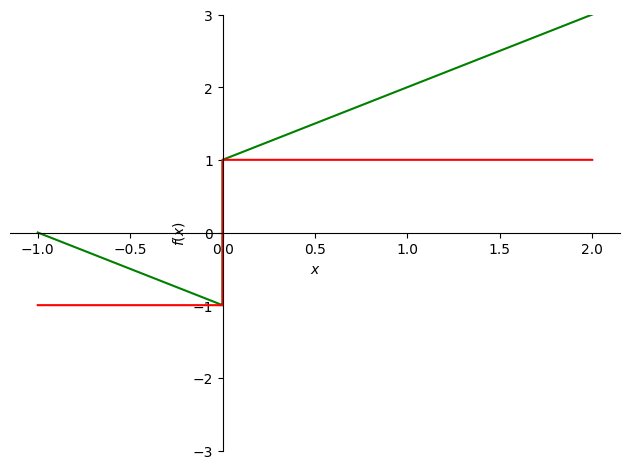

In [50]:
from sympy.abc import x, t

sign = sympy.Piecewise((-1, x < 0), (0, x == 0), (1, x > 0))
integral_sign = sympy.Piecewise((integrate(-1, (t, -1, x)), x < 0),
                                (integrate(0, (t, -1, x)), x == 0),
                                (integrate(1, (t, -1, x)), x > 0))

f1 = sympy.plot(sign, (x, -1, 2), line_color = 'red', ylim = (-3, 3), show = False)
f2 = sympy.plot(integral_sign, (x, -1, 2), line_color = 'green', ylim = (-3, 3), show = False)
f2.append(f1[0])
f2.show()

### Задача 7.
В неопределенном интеграле $\int \frac1{2\sqrt x}e^{\sqrt x},\,dx$ провести замену переменной $x=u^2$, вычислить полученный интеграл, сделать обратную замену и проверить правильность полученного результата дифференцированием.
#### Указание.
Нужно использовать положительный символ $u$.

In [68]:
u = Symbol('u', positive=True)
func_7 = sympy.exp(sympy.sqrt(x)) / (2 * sympy.sqrt(x))

I7 = Integral(func_7)
I7_u = I7.transform(x, u**2)


integral_u = I7_u.integrate(u)
integral = integral_u.subs(u, x)

display(sympy.Eq(I7, I7_u))
display(integral_u  + C)

display(integral + C)
print('Проверка:')
display(diff(integral))

Eq(Integral(exp(sqrt(x))/(2*sqrt(x)), x), Integral(exp(u), u))

C + exp(u)

C + exp(x)

Проверка:


exp(x)

### Индивидуальное задание
Провести замену переменных в определенном интеграле, представить результат в виде двух уравнений, как в примере:
\begin{align*}
\int_1^4 \frac{dx}{\sqrt{x}\left(\sqrt{x}+1\right)} = \int_1^2 \frac{2\,dy}{y + 1}\\
\int_1^2 \frac{2\,dy}{y + 1} = 2(\ln 3 - \ln 2)
\end{align*}
(с точностью до перестановки слагаемых и сомножителей)

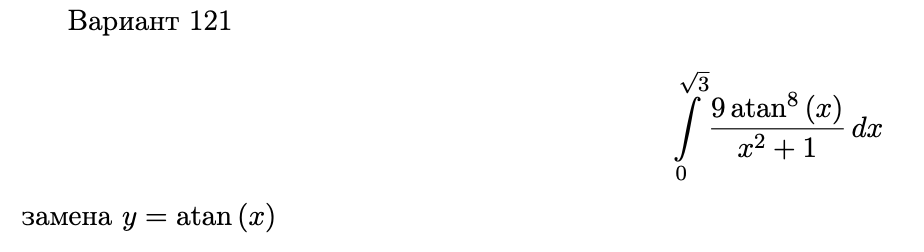

In [124]:
x, y = sympy.symbols('x y', positive=True)

iw = 9 * sympy.atan(x) ** 8 / (x**2 + 1)

integral = Integral(iw, (x, 0, 3**S.Half))
integral_y = integral.transform(sympy.atan(x), y)

display(sympy.Eq(integral, integral_y))
display(sympy.Eq(integral_y, integrate(iw, (x, 0, sympy.sqrt(3)))))

Eq(Integral(9*atan(x)**8/(x**2 + 1), (x, 0, sqrt(3))), Integral(9*atan(tan(y))**8, (y, 0, pi/3)))

Eq(Integral(9*atan(tan(y))**8, (y, 0, pi/3)), pi**9/19683)